# Proyecto Final - Búsqueda Local 

#### Mónica Ángeles Sánchez 317159662

In [1]:
# Biblioteca:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
# Creamos una función que genera un color para asignarle a un vértice,
# asegurándose de que dicho color no esté siendo utilizado por ningún vértice adyacente

def encontrar_color_valido(vertice, solucion, matriz_adyacencia):
    num_vertices = len(solucion)
    # Crea una lista para registrar los colores utilizados
    colores_invalidos = [False] * (num_vertices + 1)
    
    # Marca los colores de los vértices adyacentes como no válidos
    for i in range(num_vertices):
        # Si son adyacentes, el color no es válido
        if matriz_adyacencia[vertice][i] == 1:
            colores_invalidos[solucion[i]] = True
    
    # Encuentra un color válido (no usado por ningún adyacente)
    while True:
        color = random.randint(0, num_vertices)
        if not colores_invalidos[color]:
            break
    
    return color

In [3]:
# Creamos una función que genera soluciones aleatorias válidas, es decir,
# ningún vértice adyacente tiene el mismo color.

def solucion_aleatoria(matriz_adyacencia,num_vertices):
    solucion = []
    for i in range(num_vertices):
        solucion.append(encontrar_color_valido(i, solucion, matriz_adyacencia))
    return solucion

In [4]:
# Creamos una función que genera una solución vecina modificando el color de un vértice
# seleccionado aleatoriamente asegurándose de que la nueva solución cumpla con las
# restricciones del problema, es decir, que ningún vértice adyacente tenga el mismo color.

def generar_solucion_vecina(solucion_actual, matriz_adyacencia, num_vertices):
    solucion_vecina = solucion_actual[:]
    rand = random.Random()
    # Selecciona un vértice aleatorio
    vertice = rand.randint(0, num_vertices - 1)
    # Inicializa una lista para ver qué colores ya están asignados a los vértices adyacentes
    colores_usados = [False] * (num_vertices + 1)
    for i in range(num_vertices):
        # Si el vértice aleatorio y el vértice i son adyacentes, 
        # indica que el color solucion_actual[i] está siendo utilizado 
        if matriz_adyacencia[vertice][i] == 1:
            colores_usados[solucion_actual[i]] = True

    # Almacena la frecuencia de colores y el color
    frecuencias_colores = [[i, 0] for i in range(num_vertices + 1)]

    # Cuenta la frecuencia de cada color en la solución actual
    for color in solucion_actual:
        if color != 0:
            frecuencias_colores[color][1] += 1

    # Ordena los colores por su frecuencia de mayor a menor
    frecuencias_colores.sort(key=lambda x: x[1], reverse=True)

    # Intenta asignar el color más frecuente, luego el segundo más frecuente, y así sucesivamente
    for i in range(num_vertices):
        color_candidato = frecuencias_colores[i][0]
        if not colores_usados[color_candidato]:
            solucion_vecina[vertice] = color_candidato
            break
    # Regresa un arreglo de enteros que representan los colores de la solución vecina
    return solucion_vecina

In [5]:
# Creamos una función que toma como entrada una solución dada, que es una lista de colores
# asignados a cada vértice de una gráfica, y devuelve el número total de colores distintos 
# utilizados en esa solución para colorear la gráfica.

def evaluar_solucion(solucion):
    colores_usados = [False] * (num_vertices + 1)
    total_colores = 0
    # Itera sobre la solución, marca los colores ya utilizados y cuenta el número de apariciones
    for color in solucion:
        if not colores_usados[color]:
            colores_usados[color] = True
            total_colores += 1
    # Regresa el número de colores utilizados para colorear la gráfica
    return total_colores

In [6]:
# Creamos una función que implemente la búsqueda local siguiendo el pseudocódigo conocido.

def busqueda_local(num_max_iteraciones, matriz_adyacencia, num_vertices):
    # Parte de una solución inicial
    solucion_actual = solucion_aleatoria(matriz_adyacencia,num_vertices)
    # Evalúa la solución
    evaluacion_actual = evaluar_solucion(solucion_actual)

    # Inicializa los contadores
    # Cuenta las iteraciones consecutivas en las que no se ha encontrado una solución mejor.
    iteraciones = 0
    # Cuenta cuántas veces se ha mejorado la solución durante la búsqueda.
    mejoran=0
    # Mientras no se alcance el número máximo de iteraciones sin mejora que se permiten:
    while iteraciones < num_max_iteraciones:
        # Genera una solución vecina
        nueva_solucion = generar_solucion_vecina(solucion_actual,matriz_adyacencia, num_vertices)
        # Evalúa la solución vecina
        nueva_evaluacion = evaluar_solucion(nueva_solucion)
        # Si la solución vecina es mejor, la actualiza
        if nueva_evaluacion < evaluacion_actual:
            solucion_actual = nueva_solucion
            evaluacion_actual = nueva_evaluacion
            iteraciones = 0
            mejoran += 1
        # Si no es mejor, aumenta el número de iteraciones que llevamos
        else:
            iteraciones += 1
    # Devuelve un arreglo de enteros que representan los colores de la mejor solución encontrada
    return solucion_actual

### Aplicación

Definimos la matriz de adyacencia como una lista de listas.
La matriz de adyacencia representa una gráfica no dirigida donde cada fila de la matriz corresponde a un vértice, y el valor en la posición [i][j] indica si hay una arista entre el vértice i y el vértice j (1 si hay una arista, 0 si no la hay).

In [7]:
# Código para generar las matrices de adyacencia

# Definir el tamaño de la matriz
num_vertices = 20

# Inicializar la matriz con ceros
matriz_adyacencia = [[0] * num_vertices for _ in range(num_vertices)]

# Llenar la matriz con valores aleatorios
for i in range(num_vertices):
    for j in range(i + 1, num_vertices):
        matriz_adyacencia[i][j] = matriz_adyacencia[j][i] = random.randint(0, 1)

# Mostrar la matriz
#for fila in matriz_adyacencia:
#    print(fila)

In [8]:
# Código para graficar las soluciones obtenidas

# Creamos la función para dibujar la gráfica 
def dibujar_grafica(matriz_adyacencia, solucion_final):
    G = nx.Graph()
    # Agrega cada vértice de la matriz como un nodo a la gráfica
    for i in range(len(matriz_adyacencia)):
        G.add_node(i)
    # Agrega una arista entre los vértices i y j si la hay 
    for i in range(len(matriz_adyacencia)):
        for j in range(i + 1, len(matriz_adyacencia[i])):
            if matriz_adyacencia[i][j] == 1:
                G.add_edge(i, j)

    # Asigna colores a los nodos según la solución final
    colors = [solucion_final[node] for node in G.nodes()]

    # Dibuja la gráfica 
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

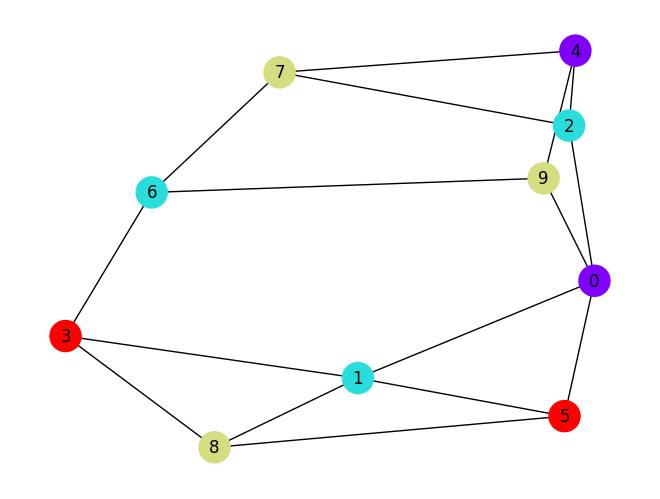

([0, 1, 1, 3, 0, 3, 1, 2, 2, 2], 4)

In [9]:
# Matriz 1 - 100 iteraciones sin mejora

matriz_adyacencia_1 = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] 
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_1)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_1 = 100

# Ejecutamos la búsqueda local
solucion_final_1 = busqueda_local(num_max_iteraciones_1, matriz_adyacencia_1, num_vertices)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_1, solucion_final_1)

# Mostramos la solución final y el número de colores utilizados
solucion_final_1, evaluar_solucion(solucion_final_1)

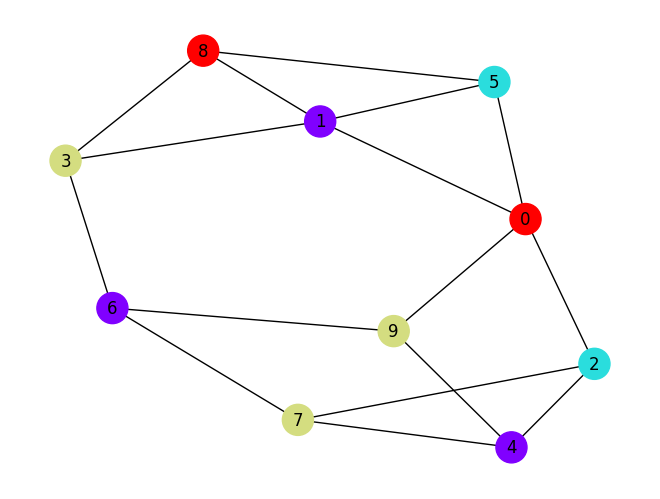

([4, 1, 2, 3, 1, 2, 1, 3, 4, 3], 4)

In [10]:
# Matriz 1 - 1,000 iteraciones sin mejora

matriz_adyacencia_1 = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] 
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_1)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_1 = 1000

# Ejecutamos la búsqueda local
solucion_final_1 = busqueda_local(num_max_iteraciones_1, matriz_adyacencia_1, num_vertices)

# Dibujamos la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_1, solucion_final_1)

# Mostramos la solución final y el número de colores utilizados
solucion_final_1, evaluar_solucion(solucion_final_1)

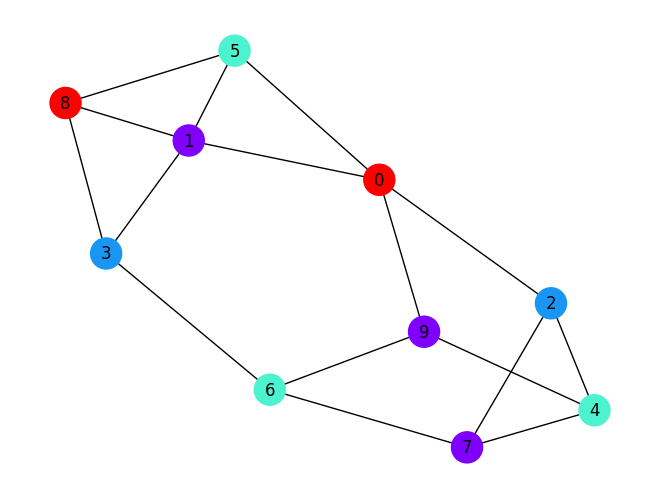

([6, 1, 2, 2, 3, 3, 3, 1, 6, 1], 4)

In [11]:
# Matriz 1 - 10,000 iteraciones sin mejora

matriz_adyacencia_1 = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] 
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_1)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_1 = 10000

# Ejecutamos la búsqueda local
solucion_final_1 = busqueda_local(num_max_iteraciones_1, matriz_adyacencia_1, num_vertices)

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_1, solucion_final_1)

# Muestra la solución final y el número de colores utilizados
solucion_final_1, evaluar_solucion(solucion_final_1)

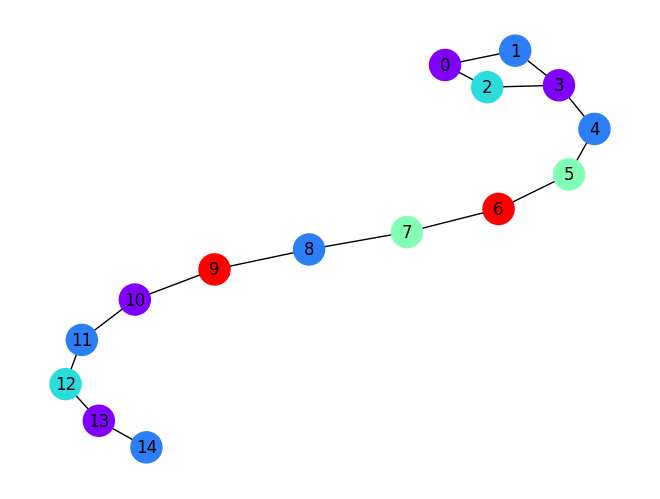

([0, 1, 2, 0, 1, 3, 6, 3, 1, 6, 0, 1, 2, 0, 1], 5)

In [12]:
# Matriz 2 - 100 iteraciones sin mejora

matriz_adyacencia_2 = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_2)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_2 = 100

# Ejecutamos la búsqueda local
solucion_final_2 = busqueda_local(num_max_iteraciones_2, matriz_adyacencia_2, num_vertices)

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_2, solucion_final_2)

# Muestra la solución final y el número de colores utilizados
solucion_final_2, evaluar_solucion(solucion_final_2)

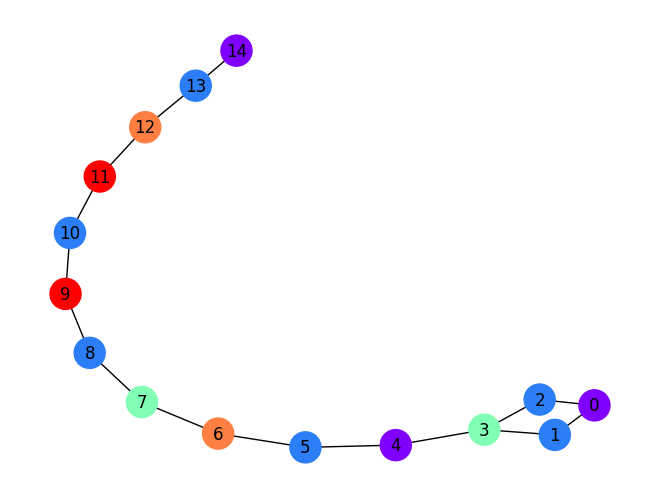

([0, 1, 1, 3, 0, 1, 5, 3, 1, 6, 1, 6, 5, 1, 0], 5)

In [13]:
# Matriz 2 - 1,000 iteraciones sin mejora

matriz_adyacencia_2 = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_2)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_2 = 1000

# Ejecutamos la búsqueda local
solucion_final_2 = busqueda_local(num_max_iteraciones_2, matriz_adyacencia_2, num_vertices)

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_2, solucion_final_2)

# Muestra la solución final y el número de colores utilizados
solucion_final_2, evaluar_solucion(solucion_final_2)

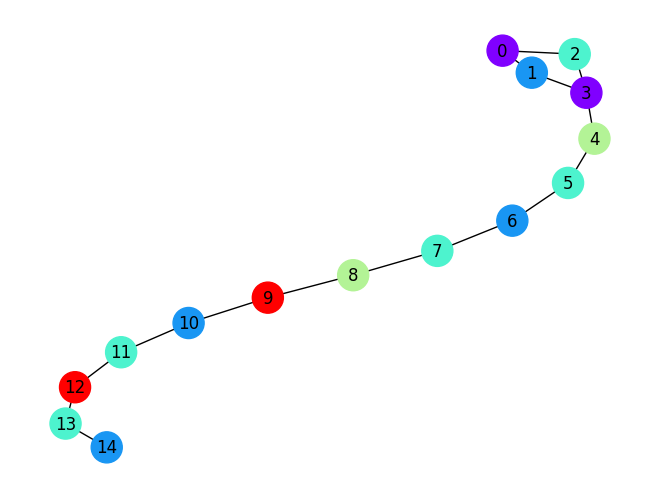

([0, 1, 2, 0, 3, 2, 1, 2, 3, 5, 1, 2, 5, 2, 1], 5)

In [14]:
# Matriz 2 - 10,000 iteraciones sin mejora

matriz_adyacencia_2 = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_2)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_2 = 10000

# Ejecutamos la búsqueda local
solucion_final_2 = busqueda_local(num_max_iteraciones_2, matriz_adyacencia_2, num_vertices)

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_2, solucion_final_2)

# Muestra la solución final y el número de colores utilizados
solucion_final_2, evaluar_solucion(solucion_final_2)

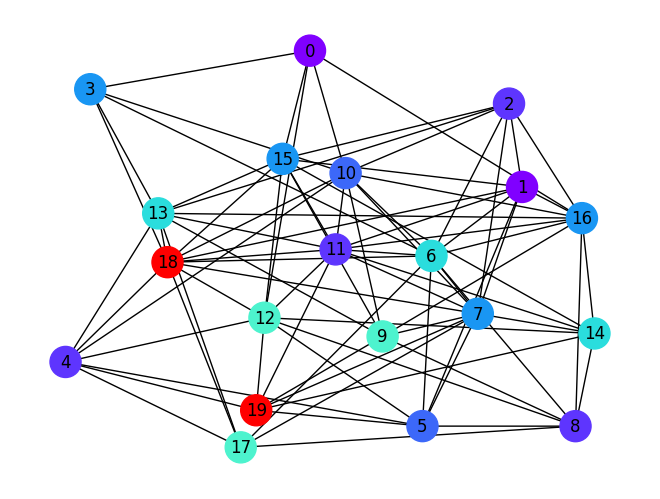

([0, 0, 1, 3, 1, 2, 5, 3, 1, 6, 2, 1, 6, 5, 5, 3, 3, 6, 15, 15], 7)

In [15]:
# Matriz 3 - 100 iteraciones sin mejora

matriz_adyacencia_3 = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_3)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_3 = 100

# Ejecutamos la búsqueda local
solucion_final_3 = busqueda_local(num_max_iteraciones_3, matriz_adyacencia_3, num_vertices)

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_3, solucion_final_3)

# Muestra la solución final y el número de colores utilizados
solucion_final_3, evaluar_solucion(solucion_final_3)

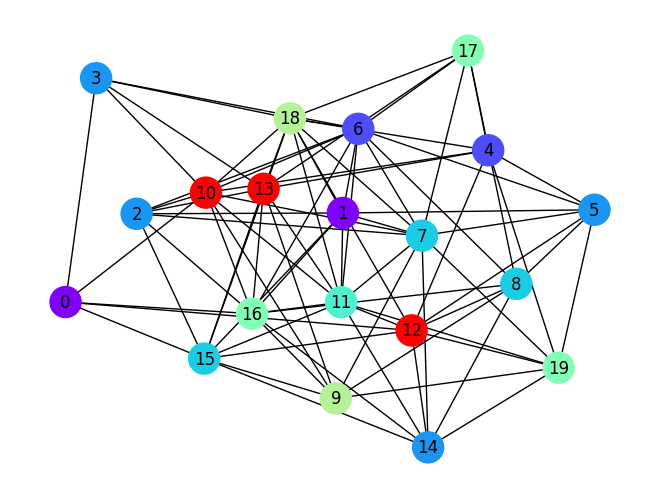

([0, 0, 2, 2, 1, 2, 1, 3, 3, 6, 10, 4, 10, 10, 2, 3, 5, 5, 6, 5], 8)

In [16]:
# Matriz 3 - 1,000 iteraciones sin mejora

matriz_adyacencia_3 = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_3)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_3 = 1000

# Ejecutamos la búsqueda local
solucion_final_3 = busqueda_local(num_max_iteraciones_3, matriz_adyacencia_3, num_vertices)

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_3, solucion_final_3)

# Muestra la solución final y el número de colores utilizados
solucion_final_3, evaluar_solucion(solucion_final_3)

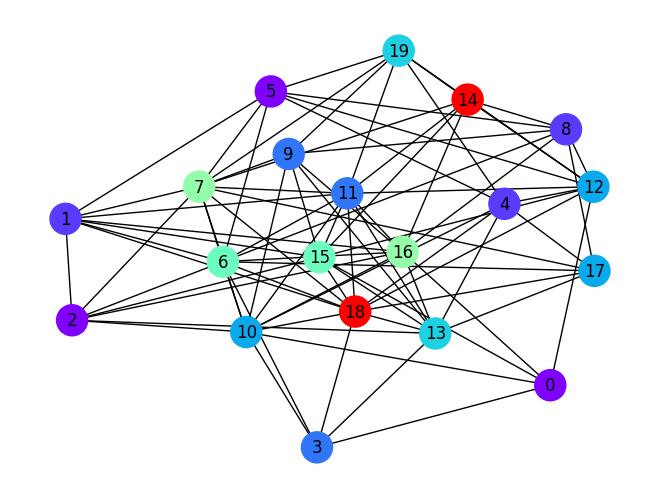

([0, 1, 0, 2, 1, 0, 6, 7, 1, 2, 3, 2, 3, 4, 13, 6, 7, 3, 13, 4], 8)

In [17]:
# Matriz 3 - 10,000 iteraciones sin mejora

matriz_adyacencia_3 = [
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia_3)

# Número máximo de iteraciones sin mejora
num_max_iteraciones_3 = 10000

# Ejecutamos la búsqueda local
solucion_final_3 = busqueda_local(num_max_iteraciones_3, matriz_adyacencia_3, num_vertices)

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia_3, solucion_final_3)

# Muestra la solución final y el número de colores utilizados
solucion_final_3, evaluar_solucion(solucion_final_3)